## Importing libraries & function

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [419]:
import os
path = '/content/drive/My Drive/data/'
os.listdir(path)

['POS_CASH_balance.csv',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'previous_application.csv',
 'sample_submission.csv',
 'HomeCredit_columns_description.csv',
 'IDX_credit_loan_predictions.ipynb',
 'HCI.ipynb',
 'HCI2.ipynb',
 'HCI4.ipynb',
 'HCI3_Colab.ipynb']

In [420]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Dataset

### Keterangan Variabel target
- 1 = klien dengan kesulitan pembayaran: dia mengalami keterlambatan pembayaran lebih dari X hari pada setidaknya satu dari angsuran Y pertama pinjaman dalam sampel kami
- 0 = semua kasus lainnya

In [421]:
#application_train = pd.read_csv("E:/Data Science_Home Credit Indonesia Data Scientist Project Based Internship Program/Week 4/data/application_train.csv")
#df = pd.read_csv(path + 'data_komen.csv', encoding='utf-8')
application_train = pd.read_csv(path + "application_train.csv", encoding='utf-8')
print('This dataset has %d rows dan %d columns.\n' % application_train.shape)

This dataset has 307511 rows dan 122 columns.



In [422]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## EDA (Exploratory Data Analysis)

### Cek Type Fitur

In [423]:
print('Data types: \n')
application_train.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    in

### Check Distribusi TARGET

In [424]:
def data_split(df, start, end, date_col):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df[date_col] >= start) & (df[date_col] < end)]
    #data = df[(df.order_date >= start) & (df.order_date < end)]
    data = data.reset_index(drop=True)
    #data = data.sort_values(["date", "tic"], ignore_index=True)
    #data.index = data.date.factorize()[0]
    return data


def target_info(df_target_column):
    '''
    Print target column information -- count for each unique values in target column
    Input: target column in dataframe
    '''
    proportion_true=str(round(sum(df_target_column == True) / len(df_target_column), 2) * 100)

    proportion_false=str(round(sum(df_target_column == False) / len(df_target_column), 3) * 100)

    print('There are total {} records in our data.'.format(len(df_target_column)))
    print('Is Fraud:')
    print('Count: {}'.format(sum(df_target_column == True)))
    print('Proportion (Fraud): {}'.format(proportion_true
                                  + '%'))
    print('Not Fraud:')
    print('Count: {}'.format(sum(df_target_column == False)))
    print('Proportion (Not Fraud): {}'.format(proportion_false
                                  + '%'))
    plt.figure(figsize=(5, 5))
    sns.barplot(x=df_target_column.value_counts().index, y=df_target_column.value_counts())
    plt.title('Not Fraud vs Fraud Counts')
    plt.ylabel('Count')
    return proportion_true

There are total 307511 records in our data.
Is Fraud:
Count: 24825
Proportion (Fraud): 8.0%
Not Fraud:
Count: 282686
Proportion (Not Fraud): 91.9%


'8.0'

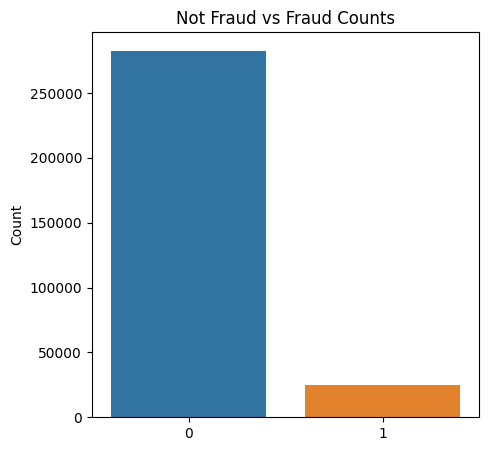

In [425]:
#check the fraud proportion of the data
target_info(application_train['TARGET'])

In [426]:
column_names = application_train.columns
print("Nama-nama variabel dalam DataFrame application_train:")
for name in column_names:
    print(name)

Nama-nama variabel dalam DataFrame application_train:
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAR

In [427]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Insight dari Data

### Jumlah nasabah yang mengajukan pinjaman

In [428]:
customers = application_train.groupby('TARGET')['CODE_GENDER'].count().reset_index()
customers.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

customers['Customers_pct'] = round(customers.Customers / customers.Customers.sum(), 2)
customers

,TARGET,Customers,Customers_pct
0,0,282686,0.92
1,1,24825,0.08


Dari tabel di atas, terlihat 92% customers tidak memiliki masalah dalam membayar kembali pinjaman dalam waktu tertentu dan 8% memiliki masalah
selanjutnya, apakah pelanggan tidak memiliki masalah dalam membayar kembali pinjaman?

### Status Pernikahan (Marital Status)

In [429]:
NAME_FAMILY_STATUS_count = application_train.NAME_FAMILY_STATUS.value_counts()
NAME_FAMILY_STATUS_count

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

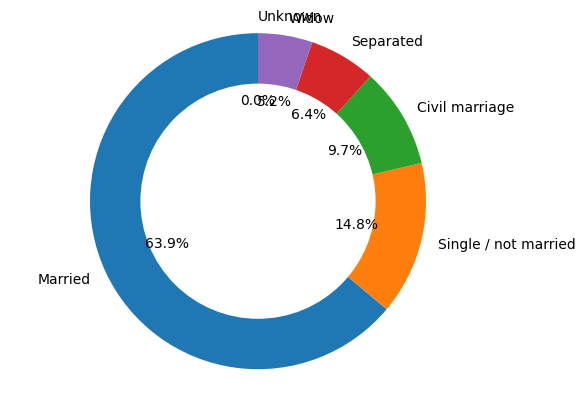

In [430]:
# Create a pie chart
plt.pie(NAME_FAMILY_STATUS_count, labels=NAME_FAMILY_STATUS_count.index, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

PIE CHART. Dari pie chart diatas, terdapat 6 kategori terkait status pernikahan. Dilakukan penyederhanaan menjadi 2 kategori, yaitu menikah dan belum menikah

In [431]:
Marital_status = []
married = ['Married', 'Civil marriage']

for i in application_train.NAME_FAMILY_STATUS:
    if i in married:
        Marital_status.append('Married')
    else:
        Marital_status.append('Unmarried')

application_train['Marital_status'] = Marital_status
application_train.drop(columns= 'NAME_FAMILY_STATUS', inplace=True)

In [432]:
NAME_FAMILY_STATUS_new = application_train[application_train['TARGET'] == 0].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
NAME_FAMILY_STATUS_new

,Marital_status,CODE_GENDER
0,Married,208396
1,Unmarried,74290


In [433]:
NAME_FAMILY_STATUS_new = application_train[application_train['TARGET'] == 0].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
NAME_FAMILY_STATUS_new.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

NAME_FAMILY_STATUS_new['Customers_pct'] = round(customers.Customers / customers.Customers.sum(), 2)
NAME_FAMILY_STATUS_new

,Marital_status,Customers Count,Customers_pct
0,Married,208396,0.92
1,Unmarried,74290,0.08


In [434]:
status_menikah = application_train.groupby(['Marital_status', 'TARGET'])['CODE_GENDER'].count().reset_index()
status_menikah .rename(columns={'CODE_GENDER': 'Customers'}, inplace=True)

status_menikah ['Customers_pct'] = round(status_menikah.Customers / status_menikah.Customers.sum(), 2)
mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

status_menikah['TARGET'] = status_menikah['TARGET'].map(mapping_target)
status_menikah

,Marital_status,TARGET,Customers,Customers_pct
0,Married,Tidak Terkendala,208396,0.68
1,Married,Terkendala,17811,0.06
2,Unmarried,Tidak Terkendala,74290,0.24
3,Unmarried,Terkendala,7014,0.02


TABEL. Tidak ada perbedaan signifikan pada status pernikahan karena jumlah pengajuan pinjaman yang diterima antara kedua kategori (Married dan Unmarried) memiliki nilai tidak jauh berbeda

### Usia (Age)

Karena tidak ada kolom usia pelanggan, kami akan membuatnya menggunakan kolom DAYS_BIRTH yang berisi data perbedaan antara hari ini dan ulang tahun pelanggan. Sekarang kami membuat grup berdasarkan usia pelanggan dengan mengikuti aturan ini:

In [435]:
application_train['Age'] =  np.floor(application_train['DAYS_BIRTH'] / -365).astype(int)
application_train.drop(columns= 'DAYS_BIRTH', inplace=True)

In [436]:
age_category = []
for i in application_train['Age']:
    if i < 36:
        age_category.append('Young Adult')
    elif i < 51:
        age_category.append('Adult')
    else:
        age_category.append('Older')

application_train['Age_Category'] = age_category

In [437]:
category_age = application_train.groupby(['Age_Category','TARGET'])['CODE_GENDER'].count().reset_index().sort_values('Age_Category').reset_index()
category_age.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
category_age.drop(columns = 'index', inplace=True)

name_of_ot = list(category_age['Age_Category'].unique())
percentage = []

for i in name_of_ot:
    data = category_age[category_age['Age_Category'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

category_age['percentage'] = percentage

mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

category_age['TARGET'] = category_age['TARGET'].map(mapping_target)
category_age

,Age_Category,TARGET,Customers,percentage
0,Adult,Tidak Terkendala,108678,0.92
1,Adult,Terkendala,9403,0.08
2,Older,Tidak Terkendala,91718,0.94
3,Older,Terkendala,5469,0.06
4,Young Adult,Tidak Terkendala,82290,0.89
5,Young Adult,Terkendala,9953,0.11


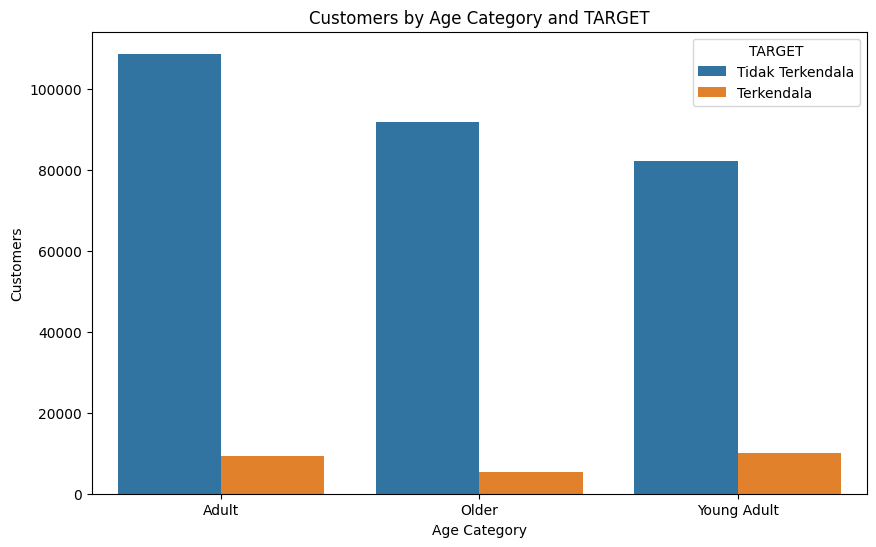

In [438]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Customers', hue='TARGET', data=category_age)

plt.xlabel('Age Category')
plt.ylabel('Customers')
plt.title('Customers by Age Category and TARGET')
plt.legend(title='TARGET')
plt.show()

Dari chart dan tabel diatas, terlihat bahwa kategori usia Adult memiliki aplikasi pinjaman terbesar (92%) dilunasi tidak terkendala, sehingga Home Credit dapat menargetkan kategori Adult untuk melakukan pinjaman.

## Income Type

In [439]:
it = application_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
it.sort_values(by='SK_ID_CURR', ascending=False)
it.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,0,10
1,Commercial associate,0,66257
2,Commercial associate,1,5360
3,Maternity leave,0,3
4,Maternity leave,1,2
5,Pensioner,0,52380
6,Pensioner,1,2982
7,State servant,0,20454
8,State servant,1,1249
9,Student,0,18


In [440]:
application_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


Klien dengan jenis pendapatan 'cuti hamil' dan 'pengangguran' memiliki persentase tertinggi sebesar 40% dan 36% dari TARGET = 1, yaitu mengalami masalah dalam membayar kembali pinjaman dibandingkan income type lainnya

### Tipe Kontrak (Name Contract Type)

In [441]:
tipe_kontrak = application_train.groupby([ 'NAME_CONTRACT_TYPE','TARGET'])['CODE_GENDER'].count().reset_index().sort_values(by = 'NAME_CONTRACT_TYPE')
tipe_kontrak.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

nama_tipe_kontrak  = list(tipe_kontrak['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in nama_tipe_kontrak:
    data = tipe_kontrak[tipe_kontrak['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers Count'].sum()
    for x,y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

tipe_kontrak['Percent'] = percentage
tipe_kontrak['Percent All'] = round(tipe_kontrak['Customers Count'] / total, 2)
mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

tipe_kontrak['TARGET'] = tipe_kontrak['TARGET'].map(mapping_target)
tipe_kontrak

,NAME_CONTRACT_TYPE,TARGET,Customers Count,Percent,Percent All
0,Cash loans,Tidak Terkendala,255011,0.92,8.71
1,Cash loans,Terkendala,23221,0.08,0.79
2,Revolving loans,Tidak Terkendala,27675,0.95,0.95
3,Revolving loans,Terkendala,1604,0.05,0.05


TABEL. Tidak ada perbedaan signifikan dalam NAME_CONTRACT_TYPE, Persentase pelanggan memiliki masalah untuk membayar pinjaman serupa. Pinjaman tunai (cash loans) adalah favorit pelanggan.

### Jenis Pekerjaan (Occupation Type)

In [442]:
jenis_kerja = application_train.groupby([ 'OCCUPATION_TYPE','TARGET'])['CODE_GENDER'].count().reset_index().sort_values(by = 'OCCUPATION_TYPE')
jenis_kerja.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

nama_jenis_kerja  = list(jenis_kerja['OCCUPATION_TYPE'].unique())
percentage = []

for i in nama_jenis_kerja:
    data = jenis_kerja[jenis_kerja['OCCUPATION_TYPE'] == i]
    total = data['Customers Count'].sum()
    for x,y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

jenis_kerja['Percent'] = percentage
jenis_kerja['Percent All'] = round(jenis_kerja['Customers Count'] / total, 2)

mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

jenis_kerja['TARGET'] = jenis_kerja['TARGET'].map(mapping_target)
jenis_kerja.sort_values('Percent', ascending=False).head(10)

,OCCUPATION_TYPE,TARGET,Customers Count,Percent,Percent All
0,Accountants,Tidak Terkendala,9339,0.95,6.93
6,Core staff,Tidak Terkendala,25832,0.94,19.16
14,IT staff,Tidak Terkendala,492,0.94,0.36
12,High skill tech staff,Tidak Terkendala,10679,0.94,7.92
10,HR staff,Tidak Terkendala,527,0.94,0.39
20,Managers,Tidak Terkendala,20043,0.94,14.87
30,Secretaries,Tidak Terkendala,1213,0.93,0.90
24,Private service staff,Tidak Terkendala,2477,0.93,1.84
22,Medicine staff,Tidak Terkendala,7965,0.93,5.91
26,Realty agents,Tidak Terkendala,692,0.92,0.51


TABEL. Dari tabel di atas, terlihat bahwa
- Core staff, HR staff, High skill tect staff, IT staff, Managers memiliki persentase aplikasi pinjaman yang diterima 94% (tinggi)
- Medicine staff, Private service staff, dan Secretaries memiliki persentase aplikasi pinjaman yang diterima 92% (tinggi)
- Realty agents memiliki persentase aplikasi pinjaman yang diterima 92% (tinggi)
- jumlah nasabah dengan pekerjaan HR staff, IT staff dan Realty agents yang mengajukan pinjaman kurang dari seribu nasabah, sehingga disarankan untuk membuat campaign pada ketiga pekerjaan tersebut

## Check Missing Values

In [443]:
application_train = pd.read_csv(path + "application_train.csv", encoding='utf-8')
data_NA = pd.DataFrame(application_train.isna().sum().sort_values(ascending=False), columns=['Total Null Data']).reset_index()
data_NA['Percentage'] = (data_NA['Total Null Data'] / len(application_train) ) * 100
data_NA.head(20)

,index,Total Null Data,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


we will remove the feature that have more than 60% null data

In [444]:
application_train = application_train.drop(['COMMONAREA_MEDI',
'COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI',
'FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE'], axis = 1)
application_train = application_train.drop(columns = 'SK_ID_CURR')
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 104 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

In [445]:
data_NA = pd.DataFrame(application_train.isna().sum().sort_values(ascending=False), columns=['Total Null Data']).reset_index()
data_NA['Percentage'] = (data_NA['Total Null Data'] / len(application_train) ) * 100
data_NA.head(50)

,index,Total Null Data,Percentage
0,LANDAREA_AVG,182590,59.376738
1,LANDAREA_MODE,182590,59.376738
2,LANDAREA_MEDI,182590,59.376738
3,BASEMENTAREA_MODE,179943,58.515956
4,BASEMENTAREA_AVG,179943,58.515956
5,BASEMENTAREA_MEDI,179943,58.515956
6,EXT_SOURCE_1,173378,56.381073
7,NONLIVINGAREA_AVG,169682,55.179164
8,NONLIVINGAREA_MEDI,169682,55.179164
9,NONLIVINGAREA_MODE,169682,55.179164


In [446]:
application_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,124921.000000,153161.000000,137829.000000,151450.000000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,124921.000000,153161.000000,137829.000000,151450.000000,127568.000000,157504.000000,143620.000000,152683.000000,154491.000000,124921.000000,153161.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.078942,0.149725,0.226282,0.066333,0.107399,0.028358,0.114231,0.087543,0.977065,0.074490,0.145193,0.222315,0.064958,0.105975,0.027022,0.117850,0.087955,0.977752,0.078078,0.149213,0.225897,0.067169,0.108607,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602

### Checking Outlier

In [447]:
num = application_train.select_dtypes(include=['float64', 'int64'])
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})
df_num['Std_value'] = num.std().reset_index(drop=True)
df_num['Max'] = num.max().values
df_num['Min'] = num.min().values
df_num.sort_values('Std_value', ascending=False).head(20)

,Name_of_column,Total_unique,Std_value,Max,Min
3,AMT_CREDIT,5603,402490.776996,4050000.0,45000.0
5,AMT_GOODS_PRICE,1002,369446.460540,4050000.0,40500.0
2,AMT_INCOME_TOTAL,2548,237123.146279,117000000.0,25650.0
8,DAYS_EMPLOYED,12574,141275.766519,365243.0,-17912.0
4,AMT_ANNUITY,13672,14493.737315,258025.5,1615.5
7,DAYS_BIRTH,17460,4363.988632,-7489.0,-25229.0
9,DAYS_REGISTRATION,15688,3522.886321,0.0,-24672.0
10,DAYS_ID_PUBLISH,6168,1509.450419,0.0,-7197.0
62,DAYS_LAST_PHONE_CHANGE,3773,826.808487,0.0,-4292.0
20,HOUR_APPR_PROCESS_START,24,3.265832,23.0,0.0


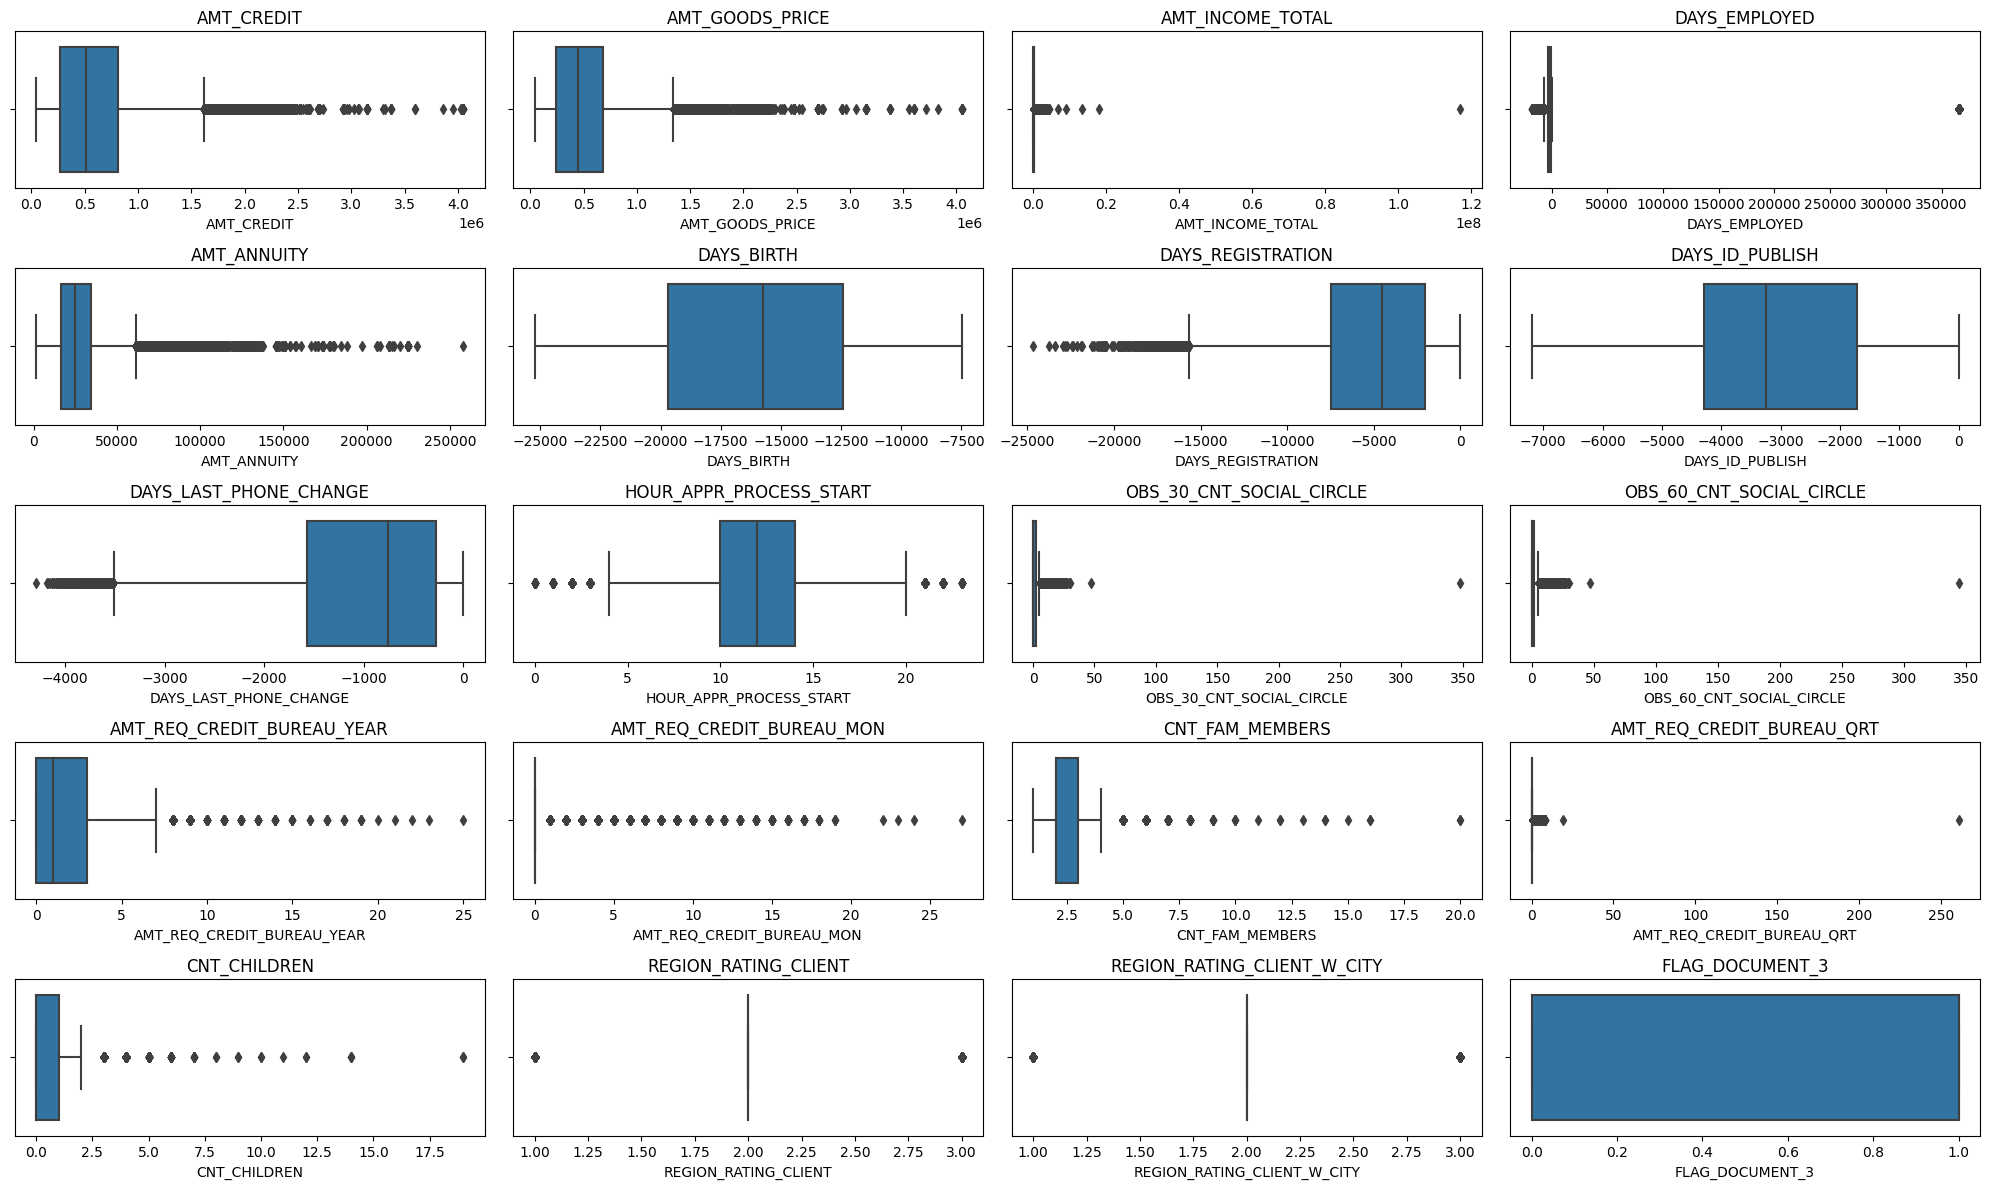

In [448]:
# Sort the DataFrame by the 'Std_value' column in descending order and get the top 20
top_20_features = df_num.sort_values('Std_value', ascending=False).head(20)['Name_of_column'].tolist()

# Create boxplots for the top 20 features
plt.figure(figsize=(20, 12))
for i, column in enumerate(top_20_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=num, x=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

Outlier pada fitur numerik tidak dihapus karena mempeetimbangkan terdapat insight yang dapat diambil dari outlier ini.

### Mengisi NA dengan Modus (untuk data object)

In [449]:
category_columns = application_train.select_dtypes(include=['object']).columns.tolist()

for column in application_train:
    if application_train[column].isnull().any():
        if(column in category_columns):
            application_train[column]=application_train[column].fillna(application_train[column].mode()[0])

In [450]:
application_train.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No


### Mengisi NA dengan Median (untuk data integer dan float)

In [451]:
integer_columns = application_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in application_train:
    if application_train[column].isnull().any():
        if(column in integer_columns):
            application_train[column]=application_train[column].fillna(application_train[column].median())

In [452]:
application_train.select_dtypes(include=['int64','float64']).head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## One Hot Encoding

In [453]:
from sklearn.preprocessing import LabelEncoder

cat_var_new = application_train.select_dtypes(include = ['object']).columns.tolist()
application_train[cat_var_new] = application_train[cat_var_new].apply(LabelEncoder().fit_transform)
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0688,4,0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0688,4,0,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.

In [454]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0688,4,0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0,0.0688,4,0,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.

## Feature Selection

In [455]:
# Convert negative value to positive
application_train1 = application_train.copy()
application_train1.iloc[:,16:20] = application_train1.iloc[:,16:20].abs()
application_train1.iloc[:,45] = application_train1.iloc[:,45].abs()

In [456]:
# split data
x = application_train1.drop(columns = 'TARGET').abs()
y = application_train1['TARGET'].abs()

In [457]:
# Select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Features', 'Score']
feature_scores.sort_values(by = ['Score'], ascending = False).reset_index(drop=True)

,Features,Score
0,DAYS_EMPLOYED,1.954124e+08
1,AMT_GOODS_PRICE,1.223080e+08
2,AMT_CREDIT,7.669987e+07
3,DAYS_BIRTH,2.235391e+06
4,AMT_INCOME_TOTAL,1.624102e+06
5,DAYS_REGISTRATION,1.348566e+06
6,DAYS_LAST_PHONE_CHANGE,6.656876e+05
7,DAYS_ID_PUBLISH,6.195946e+05
8,AMT_ANNUITY,3.913092e+05
9,ORGANIZATION_TYPE,4.138607e+03


In [458]:
# x menggunakan 20 top fitur
x = application_train[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                       'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                       'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                       'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

y = application_train['TARGET']

## Balancing Data [Oversampling]

In [459]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_smote, y_smote = sm.fit_resample(x, y.ravel())

In [460]:
from sklearn.model_selection import train_test_split
x_trainO2, x_testO2, y_trainO2, y_testO2 = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

## Balancing Data [Undersampling]

In [461]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x, y.ravel())

In [462]:
x_trainU2, x_testU2, y_trainU2, y_testU2 = train_test_split(x_under, y_under, test_size=0.2, random_state=42)

## Modelling

In [463]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### 1. Logistic Regression [Oversampling 80%:20%]

In [464]:
def confusionmatrix(predictions, y_testO2):
    cm = confusion_matrix(y_testO2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.57      0.62      0.60     56536
           1       0.59      0.53      0.56     56539

    accuracy                           0.58    113075
   macro avg       0.58      0.58      0.58    113075
weighted avg       0.58      0.58      0.58    113075



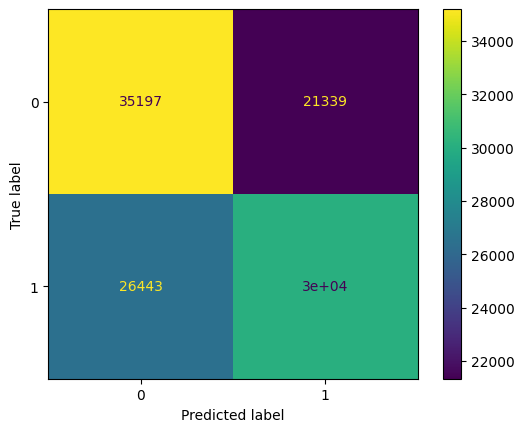

In [465]:
lr = LogisticRegression()
lr.fit(x_trainO2, y_trainO2.ravel())
predictions = lr.predict(x_testO2)

# print classification report
print(classification_report(y_testO2, predictions))
confusionmatrix(predictions, y_testO2)

In [466]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testO2, predictions)
bal_acc

0.5774321059554661

In [467]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testO2, predictions)

0.5774321059554662

              precision    recall  f1-score   support

           0       0.57      0.63      0.60    226150
           1       0.59      0.53      0.56    226147

    accuracy                           0.58    452297
   macro avg       0.58      0.58      0.58    452297
weighted avg       0.58      0.58      0.58    452297



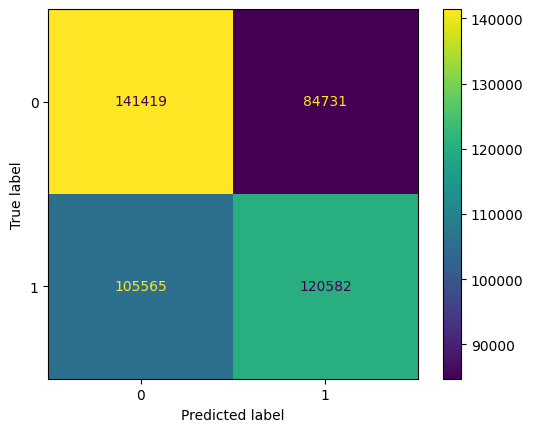

In [468]:
predictions = lr.predict(x_trainO2)

# print classification report
print(classification_report(y_trainO2, predictions))
confusionmatrix(predictions, y_trainO2)

### 2. Logistic Regression [Undersampling 80%:20%]

In [469]:
def confusionmatrix(predictions, y_testU2):
    cm = confusion_matrix(y_testU2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      4953
           1       0.58      0.54      0.56      4977

    accuracy                           0.57      9930
   macro avg       0.57      0.57      0.57      9930
weighted avg       0.57      0.57      0.57      9930



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


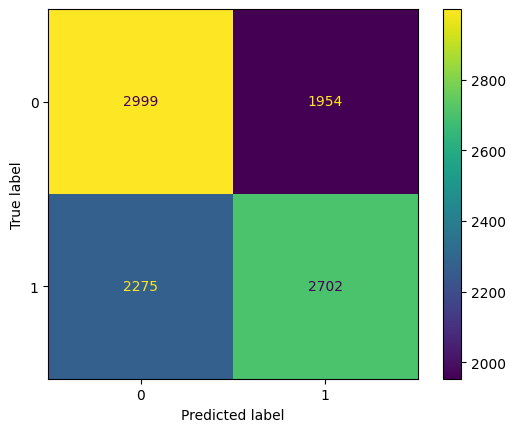

In [470]:
lr = LogisticRegression()
lr.fit(x_trainU2, y_trainU2)
predictions = lr.predict(x_testU2)

# print classification report
print(classification_report(y_testU2, predictions))
confusionmatrix(predictions, y_testU2)

In [471]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testU2, predictions)
bal_acc

0.5741944744735534

In [472]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testU2, predictions)

0.5741944744735534

              precision    recall  f1-score   support

           0       0.57      0.61      0.59     19872
           1       0.58      0.55      0.56     19848

    accuracy                           0.58     39720
   macro avg       0.58      0.58      0.58     39720
weighted avg       0.58      0.58      0.58     39720



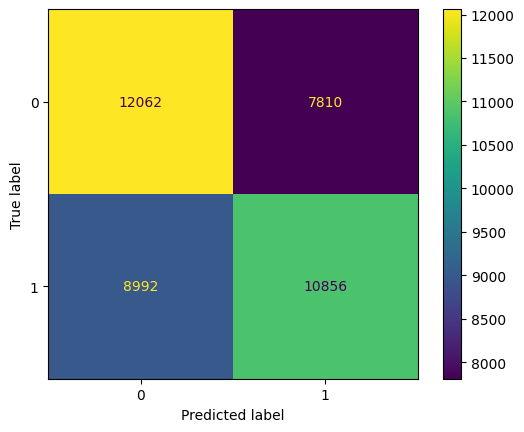

In [473]:
predictions = lr.predict(x_trainU2)

# print classification report
print(classification_report(y_trainU2, predictions))
confusionmatrix(predictions, y_trainU2)

### 3. Naive Bayes [Oversampling]

In [474]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.54      0.88      0.67     56536
           1       0.67      0.23      0.35     56539

    accuracy                           0.56    113075
   macro avg       0.60      0.56      0.51    113075
weighted avg       0.60      0.56      0.51    113075



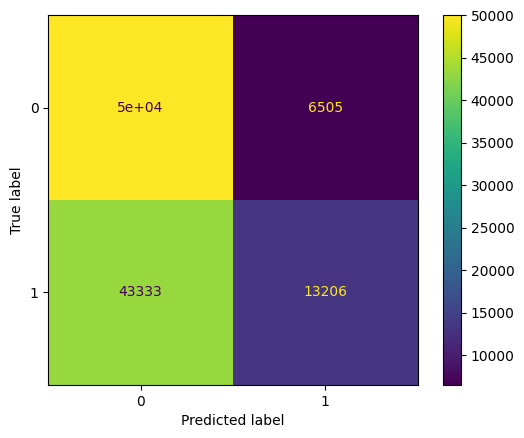

In [475]:
gb = GaussianNB().fit(x_trainO2, y_trainO2)
predictions = gb.predict(x_testO2)

# print classification report
print(classification_report(y_testO2, predictions))
confusionmatrix(predictions, y_testO2)

In [476]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testO2, predictions)
bal_acc

0.5592569272688456

              precision    recall  f1-score   support

           0       0.54      0.89      0.67    226150
           1       0.68      0.24      0.35    226147

    accuracy                           0.56    452297
   macro avg       0.61      0.56      0.51    452297
weighted avg       0.61      0.56      0.51    452297



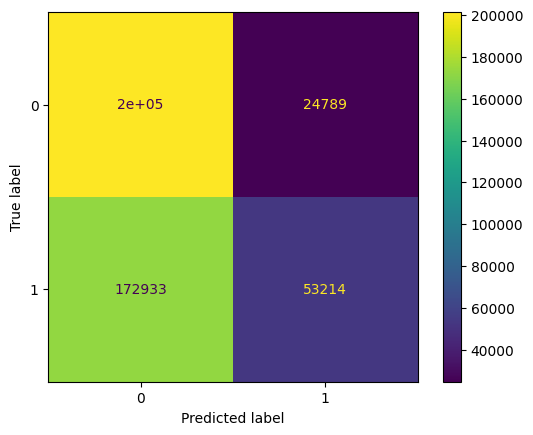

In [477]:
predictions = gb.predict(x_trainO2)

# print classification report
print(classification_report(y_trainO2, predictions))
confusionmatrix(predictions, y_trainO2)

### 4. Naive Bayes [Undersampling]

              precision    recall  f1-score   support

           0       0.50      0.97      0.66      4953
           1       0.54      0.04      0.07      4977

    accuracy                           0.50      9930
   macro avg       0.52      0.50      0.36      9930
weighted avg       0.52      0.50      0.36      9930



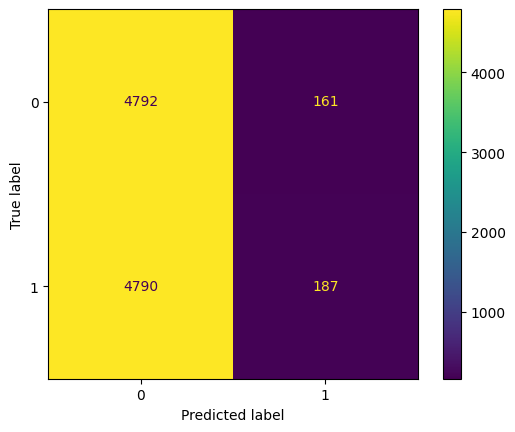

In [478]:
gb = GaussianNB().fit(x_trainU2, y_trainU2)
predictions = gb.predict(x_testU2)

# print classification report
print(classification_report(y_testU2, predictions))
confusionmatrix(predictions, y_testU2)

In [479]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testU2, predictions)
bal_acc

0.502533641425299

              precision    recall  f1-score   support

           0       0.50      0.96      0.66     19872
           1       0.48      0.03      0.06     19848

    accuracy                           0.50     39720
   macro avg       0.49      0.50      0.36     39720
weighted avg       0.49      0.50      0.36     39720



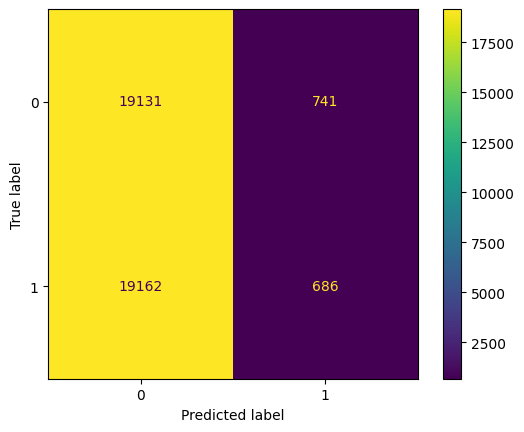

In [480]:
predictions = gb.predict(x_trainU2)

# print classification report
print(classification_report(y_trainU2, predictions))
confusionmatrix(predictions, y_trainU2)

### 5. XGBoost [Oversampling]

In [481]:
import xgboost as xgb

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     56536
           1       0.91      0.85      0.88     56539

    accuracy                           0.88    113075
   macro avg       0.88      0.88      0.88    113075
weighted avg       0.88      0.88      0.88    113075



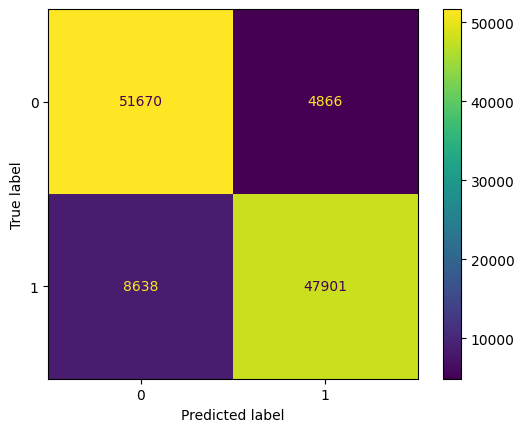

In [482]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_trainO2, y_trainO2.ravel())

predictions = xgb_model.predict(x_testO2)

# print classification report
print(classification_report(y_testO2, predictions))
confusionmatrix(predictions, y_testO2)

In [483]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testO2, predictions)
bal_acc

0.8805757246576695

In [484]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testO2, predictions)

0.8805757246576695

In [485]:
roc_auc_knn = round(roc_auc_score(y_testO2, predictions),4)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.8806


              precision    recall  f1-score   support

           0       0.86      0.92      0.89    226150
           1       0.92      0.86      0.88    226147

    accuracy                           0.89    452297
   macro avg       0.89      0.89      0.89    452297
weighted avg       0.89      0.89      0.89    452297



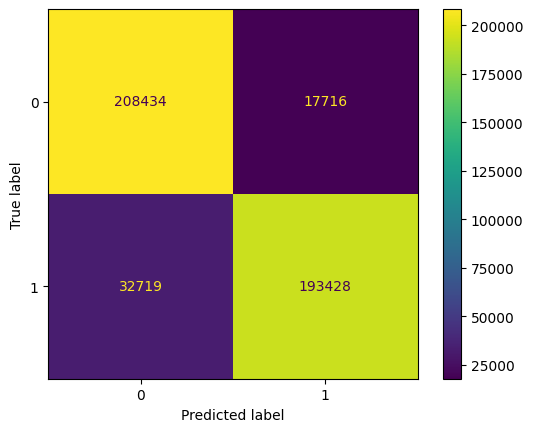

In [486]:
predictions = xgb_model.predict(x_trainO2)

# print classification report
print(classification_report(y_trainO2, predictions))
confusionmatrix(predictions, y_trainO2)

### 6. XGBoost [Undersampling]

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4953
           1       0.67      0.68      0.67      4977

    accuracy                           0.67      9930
   macro avg       0.67      0.67      0.67      9930
weighted avg       0.67      0.67      0.67      9930



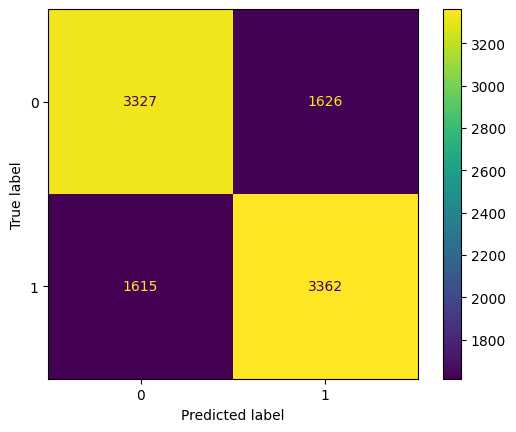

In [487]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_trainU2, y_trainU2.ravel())

predictions = xgb_model.predict(x_testU2)

# print classification report
print(classification_report(y_testU2, predictions))
confusionmatrix(predictions, y_testU2)

In [488]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testU2, predictions)
bal_acc

0.6736107231970881

In [489]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testU2, predictions)

0.673610723197088

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     19872
           1       0.80      0.80      0.80     19848

    accuracy                           0.80     39720
   macro avg       0.80      0.80      0.80     39720
weighted avg       0.80      0.80      0.80     39720



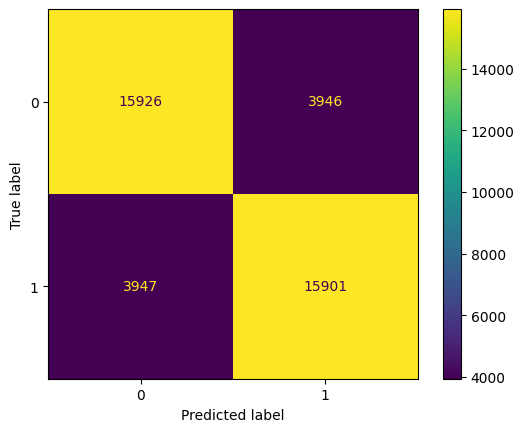

In [490]:
predictions = xgb_model.predict(x_trainU2)

# print classification report
print(classification_report(y_trainU2, predictions))
confusionmatrix(predictions, y_trainU2)

## Prediction

In [491]:
application_test = pd.read_csv(path + "application_test.csv", encoding='utf-8')
print('This dataset has %d rows dan %d columns.\n' % application_test.shape)
application_test.head()

This dataset has 48744 rows dan 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [492]:
application_test1 = application_test.copy()

### Checking NA

In [493]:
print('Missing values status:', application_test.isnull().values.any())
Test_NA = pd.DataFrame(application_test.isnull().sum(), columns=['Total Null Values'])
Test_NA['Percentage'] = (Test_NA['Total Null Values']/application_test.shape[0])*100
Test_NA.sort_values(by=['Percentage'], ascending=False).reset_index().head(20)

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
5,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_AVG,32780,67.249302
8,LIVINGAPARTMENTS_MODE,32780,67.249302
9,LIVINGAPARTMENTS_MEDI,32780,67.249302


In [494]:
application_test = application_test.drop(['COMMONAREA_MEDI',
                                          'COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE',
                                          'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
                                          'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI',
                                          'FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
                                          'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE'], axis = 1)
#application_test = application_test.drop(columns = 'SK_ID_CURR')

In [495]:
print('Missing values status:', application_test.isnull().values.any())
Test_NA = pd.DataFrame(application_test.isnull().sum(), columns=['Total Null Values'])
Test_NA['Percentage'] = (Test_NA['Total Null Values']/application_test.shape[0])*100
Test_NA.sort_values(by=['Percentage'], ascending=False).reset_index().head(20)

Missing values status: True


,index,Total Null Values,Percentage
0,LANDAREA_AVG,28254,57.964057
1,LANDAREA_MODE,28254,57.964057
2,LANDAREA_MEDI,28254,57.964057
3,BASEMENTAREA_MODE,27641,56.706466
4,BASEMENTAREA_AVG,27641,56.706466
5,BASEMENTAREA_MEDI,27641,56.706466
6,NONLIVINGAREA_AVG,26084,53.512227
7,NONLIVINGAREA_MEDI,26084,53.512227
8,NONLIVINGAREA_MODE,26084,53.512227
9,ELEVATORS_MEDI,25189,51.676104


In [496]:
print('Missing values status:', application_test.isnull().values.any())
Test_NA = pd.DataFrame(application_test.isnull().sum(), columns=['Total Null Values'])
Test_NA['Percentage'] = (Test_NA['Total Null Values']/application_test.shape[0])*100
Test_NA.sort_values(by=['Percentage'], ascending=False).reset_index().head(5)

Missing values status: True


,index,Total Null Values,Percentage
0,LANDAREA_AVG,28254,57.964057
1,LANDAREA_MODE,28254,57.964057
2,LANDAREA_MEDI,28254,57.964057
3,BASEMENTAREA_MODE,27641,56.706466
4,BASEMENTAREA_AVG,27641,56.706466


In [497]:
category_columns = application_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = application_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in application_test:
    if application_test[column].isnull().any():
        if(column in category_columns):
            application_test[column]=application_test[column].fillna(application_test[column].mode()[0])
        else:
            application_test[column]=application_test[column].fillna(application_test[column].median())

In [498]:
print('Missing values status:', application_test.isnull().values.any())
Test_NA = pd.DataFrame(application_test.isnull().sum(), columns=['Total Null Values'])
Test_NA['Percentage'] = (Test_NA['Total Null Values']/application_test.shape[0])*100
Test_NA.sort_values(by=['Percentage'], ascending=False).reset_index().head(5)

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,DEF_60_CNT_SOCIAL_CIRCLE,0,0.0
3,OBS_60_CNT_SOCIAL_CIRCLE,0,0.0
4,DEF_30_CNT_SOCIAL_CIRCLE,0,0.0


### Label Encoding

In [499]:
cat_var_new = application_test.select_dtypes(include = ['object']).columns.tolist()
application_test[cat_var_new] = application_test[cat_var_new].apply(LabelEncoder().fit_transform)

In [500]:
application_test = application_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                                     'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                                      'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                                      'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                                      'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                                      'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
application_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,-2329,450000.0,568800.0,-19241,135000.0,-5170.0,-1740.0,-812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,-4469,180000.0,222768.0,-18064,99000.0,-9118.0,0.0,-1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,-4458,630000.0,663264.0,-20038,202500.0,-2175.0,-856.0,-3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,-1866,1575000.0,1575000.0,-13976,315000.0,-2000.0,-1805.0,-4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,-2191,625500.0,625500.0,-13040,180000.0,-4000.0,-821.0,-4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [501]:
predict = pd.Series(xgb_model.predict(application_test), name = "TARGET").astype(int)
results = pd.concat([application_test1['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head(10)

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1
5,100042,0
6,100057,0
7,100065,0
8,100066,0
9,100067,0


There are total 48744 records in our data.
Is Fraud:
Count: 16927
Proportion (Fraud): 35.0%
Not Fraud:
Count: 31817
Proportion (Not Fraud): 65.3%


'35.0'

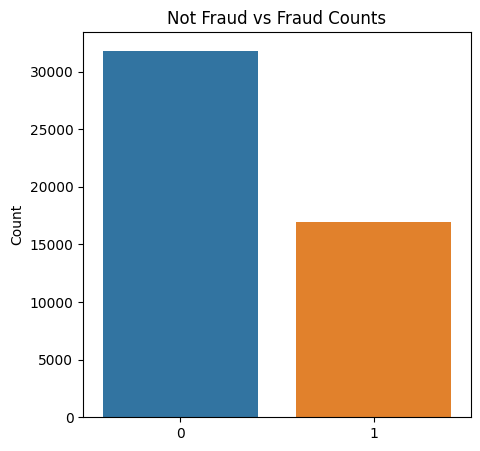

In [502]:
#check the fraud proportion of the data
target_info(results['TARGET'])

## REKOMENDASI

1. Home Credit dapat membuat campaign dengan fokus pada kalangan HR staff, IT staff, dan Reality agents untuk mengajukan pinjaman.
2. Perlu analisa lebih lanjut, Home Credit dapat melakukan survei untuk mengetahui apakah ada masalah jika klien dengan cuti melahirkan atau pengangguran mengambil kontrak pinjaman tunai. Sehingga kedepannya jika terdapat klien dengan jenis pendapatan tersebut, Home Credit dapat merekomendasikan jenis kontrak yang tepat sehingga aplikasi mereka akan disetujui.
3. Klien yang tidak mengalami kesulitan pembayaran adalah klien dalam kisaran 36-45 tahun, sehingga dapat menjadi target.